In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score,roc_curve,precision_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
bus_data = pd.read_csv('data/yelp_academic_dataset_business.csv')

In [3]:
bus_data.head()

,attributes.BYOBCorkage,attributes.BusinessParking,hours.Saturday,attributes.RestaurantsCounterService,attributes.DietaryRestrictions,attributes.OutdoorSeating,attributes.Open24Hours,attributes.BestNights,address,attributes.AgesAllowed,...,attributes.RestaurantsAttire,attributes.Ambience,attributes.BusinessAcceptsCreditCards,business_id,attributes.HasTV,attributes.Caters,attributes.BikeParking,attributes.Alcohol,attributes.DriveThru,hours.Monday
0,NaN,"{'garage': False, 'street': True, 'validated':...",11:0-21:0,NaN,NaN,False,NaN,NaN,1314 44 Avenue NE,NaN,...,casual,NaN,True,Apn5Q_b6Nz61Tq4XzPdf9A,True,NaN,False,NaN,NaN,8:30-17:0
1,NaN,"{'garage': False, 'street': True, 'validated':...",17:0-23:0,NaN,NaN,True,NaN,NaN,NaN,NaN,...,casual,NaN,True,AjEbIBw6ZFfln7ePHha9PA,False,True,False,none,False,NaN
2,NaN,"{'garage': False, 'street': False, 'validated'...",10:0-22:0,NaN,NaN,False,NaN,NaN,1335 rue Beaubien E,NaN,...,casual,"{'romantic': False, 'intimate': False, 'classy...",False,O8S5hYJ1SMc8fA4QBtVujA,True,False,True,beer_and_wine,NaN,10:0-22:0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211 W Monroe St,NaN,...,NaN,NaN,NaN,bFzdJJ3wp3PZssNEsyU23g,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005 Alyth Place SE,NaN,...,NaN,NaN,True,8USyCYqpScwiNEb58Bt6CA,NaN,NaN,NaN,NaN,NaN,8:0-17:0


In [4]:
bus_data.isnull().sum()

attributes.BYOBCorkage                   187184
attributes.BusinessParking                85169
hours.Saturday                            63217
attributes.RestaurantsCounterService     188196
attributes.DietaryRestrictions           188455
attributes.OutdoorSeating                134412
attributes.Open24Hours                   188241
attributes.BestNights                    181749
address                                    7623
attributes.AgesAllowed                   188196
attributes.DogsAllowed                   174912
state                                         0
is_open                                       0
attributes.ByAppointmentOnly             143170
attributes.RestaurantsPriceRange2         81473
attributes.WheelchairAccessible          136570
attributes.Smoking                       180480
attributes.GoodForDancing                179431
hours.Wednesday                           46750
review_count                                  0
city                                    

In [5]:
bus_data.columns

Index(['attributes.BYOBCorkage', 'attributes.BusinessParking',
       'hours.Saturday', 'attributes.RestaurantsCounterService',
       'attributes.DietaryRestrictions', 'attributes.OutdoorSeating',
       'attributes.Open24Hours', 'attributes.BestNights', 'address',
       'attributes.AgesAllowed', 'attributes.DogsAllowed', 'state', 'is_open',
       'attributes.ByAppointmentOnly', 'attributes.RestaurantsPriceRange2',
       'attributes.WheelchairAccessible', 'attributes.Smoking',
       'attributes.GoodForDancing', 'hours.Wednesday', 'review_count', 'city',
       'hours.Sunday', 'latitude', 'attributes.HairSpecializesIn',
       'attributes.WiFi', 'attributes.AcceptsInsurance',
       'attributes.NoiseLevel', 'attributes.Music', 'attributes.CoatCheck',
       'postal_code', 'attributes.Corkage', 'neighborhood',
       'attributes.GoodForMeal', 'attributes.RestaurantsDelivery',
       'hours.Thursday', 'stars', 'attributes.HappyHour',
       'attributes.RestaurantsTableService', 'attr

In [6]:
bus_data['is_open'].value_counts()

1    156606
0     31987
Name: is_open, dtype: int64

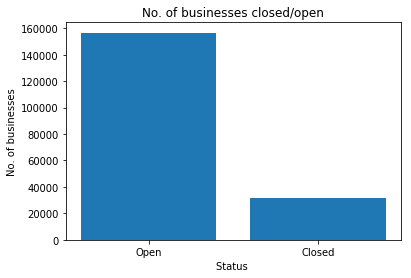

In [7]:
plt.bar(['Open','Closed'],bus_data['is_open'].value_counts() )
plt.title("No. of businesses closed/open")
plt.ylabel('No. of businesses')
plt.xlabel('Status ')
plt.show()

In [8]:
bus_data['stars'].nunique()

9

In [9]:
bus_data['state'].nunique()

69

In [10]:
bus_data['categories'].isnull().sum()

541

In [11]:
bus_data[bus_data.categories.notnull()]['categories']

0         Tours, Breweries, Pizza, Restaurants, Food, Ho...
1         Chicken Wings, Burgers, Caterers, Street Vendo...
2         Breakfast & Brunch, Restaurants, French, Sandw...
3                             Insurance, Financial Services
4         Home & Garden, Nurseries & Gardening, Shopping...
5                                        Coffee & Tea, Food
6                                            Food, Bakeries
7                                         Restaurants, Thai
8                                      Mexican, Restaurants
9                     Flowers & Gifts, Gift Shops, Shopping
10                                    Restaurants, Japanese
11                      Cajun/Creole, Southern, Restaurants
12        Bars, Sports Bars, Dive Bars, Burgers, Nightli...
13           Restaurants, Pakistani, Indian, Middle Eastern
14                                   Beauty & Spas, Barbers
15                           Delis, Restaurants, Sandwiches
16        Nightlife, Bars, American (Tra

In [12]:
bus_data['categories'][288]

nan

In [13]:
#cats_df.iloc[0:20,1]

In [14]:
#categ.category.value_counts()
#categ = categ.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [15]:
#categ.category.value_counts()

In [16]:
'''
business_category=';'.join(bus_data[bus_data.categories.notnull()]['categories'])
categ = pd.DataFrame(business_category.split(';'), columns=['category'])
cats_ser = categ.category.value_counts()

cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

plt.figure(figsize=(15,10))
plt.barh(  cats_df.iloc[0:20,0]  ,cats_df.iloc[0:20,1])
'''

"\nbusiness_category=';'.join(bus_data[bus_data.categories.notnull()]['categories'])\ncateg = pd.DataFrame(business_category.split(';'), columns=['category'])\ncats_ser = categ.category.value_counts()\n\ncats_df = pd.DataFrame(cats_ser)\ncats_df.reset_index(inplace=True)\n\nplt.figure(figsize=(15,10))\nplt.barh(  cats_df.iloc[0:20,0]  ,cats_df.iloc[0:20,1])\n"

<BarContainer object of 20 artists>

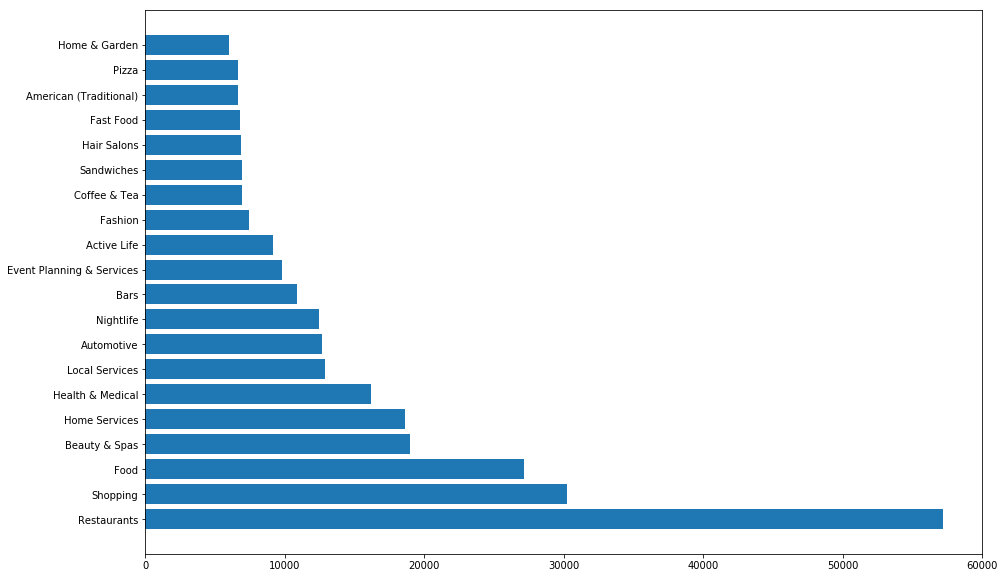

In [17]:
business_category=','.join(bus_data[bus_data.categories.notnull()]['categories'])
categ = pd.DataFrame(business_category.split(','), columns=['category'])
categ = categ.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
cats_ser = categ.category.value_counts()

cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

plt.figure(figsize=(15,10))
plt.barh(  cats_df.iloc[0:20,0]  ,cats_df.iloc[0:20,1])

#### Get Dataset ready to feed to model

In [18]:
#select columns to use
cols_to_use = [ 'stars',  'review_count']

In [19]:
%%time
#read user file
review_data = pd.read_csv("data/yelp_academic_dataset_review.csv")

Wall time: 1min 6s


In [20]:
review_data.head()

,funny,review_id,useful,business_id,user_id,text,date,stars,cool
0,0,x7mDIiDB3jEiPGPHOmDzyw,0,iCQpiavjjPzJ5_3gPD5Ebg,msQe1u7Z_XuqjGoqhB0J5g,The pizza was okay. Not the best I've had. I p...,2011-02-25,2,0
1,0,dDl8zu1vWPdKGihJrwQbpw,0,pomGBqfbxcqPv14c3XH-ZQ,msQe1u7Z_XuqjGoqhB0J5g,I love this place! My fiance And I go here atl...,2012-11-13,5,0
2,1,LZp4UX5zK3e-c5ZGSeo3kA,3,jtQARsP6P-LbkyjbO1qNGg,msQe1u7Z_XuqjGoqhB0J5g,Terrible. Dry corn bread. Rib tips were all fa...,2014-10-23,1,1
3,0,Er4NBWCmCD4nM8_p1GRdow,2,elqbBhBfElMNSrjFqW3now,msQe1u7Z_XuqjGoqhB0J5g,Back in 2005-2007 this place was my FAVORITE t...,2011-02-25,2,0
4,0,jsDu6QEJHbwP2Blom1PLCA,0,Ums3gaP2qM3W1XcA5r6SsQ,msQe1u7Z_XuqjGoqhB0J5g,Delicious healthy food. The steak is amazing. ...,2014-09-05,5,0


In [21]:
review_data_2 = review_data.groupby(by='business_id')

review_data_3 = pd.DataFrame()
review_data_3['MeanStars'] = review_data_2['stars'].mean()
review_data_3['MedianStars'] = review_data_2['stars'].median()
review_data_3['countReviews'] = review_data_2['stars'].count()

In [22]:
review_data_3.head()

,MeanStars,MedianStars,countReviews
business_id,,,
--1UhMGODdWsrMastO9DZw,4.041667,4.5,24
--6MefnULPED_I942VcFNA,3.128205,3.0,39
--7zmmkVg-IMGaXbuVd0SQ,3.870370,4.0,54
--8LPVSo5i0Oo61X01sV9A,3.500000,4.0,4
--9QQLMTbFzLJ_oT-ON3Xw,3.545455,5.0,11


In [23]:
#read checkin data
#read file
check_in_data = pd.read_csv ("data/checkin_modified_all.csv")

In [24]:
check_in_data.head() #157075 rows × 177 columns

,business_id,time.Sun-7,time.Wed-10,time.Sun-21,time.Tue-3,time.Thu-9,time.Mon-14,time.Sat-15,time.Sat-11,time.Fri-12,...,time.Mon-13,time.Wed-12,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Tot_checkin
0,7KPBkxAOEtb3QeIL9PEErg,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,15.0,18.0,21.0,22.0,24.0,28.0,23.0,151.0
1,kREVIrSBbtqBhIYkTccQUg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,0.0,1.0,2.0,0.0,2.0,1.0,7.0
2,tJRDll5yqpZwehenzE2cSg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,0.0,0.0,1.0,1.0,1.0,1.0,6.0
3,tZccfdl6JNw-j5BKnCTIQQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
4,r1p7RAMzCV_6NPF0dNoR3g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,3.0,1.0,5.0


In [25]:
check_in_data[['business_id','Tot_checkin']].head()

,business_id,Tot_checkin
0,7KPBkxAOEtb3QeIL9PEErg,151.0
1,kREVIrSBbtqBhIYkTccQUg,7.0
2,tJRDll5yqpZwehenzE2cSg,6.0
3,tZccfdl6JNw-j5BKnCTIQQ,3.0
4,r1p7RAMzCV_6NPF0dNoR3g,5.0


Merge checkin-modified and review data

In [26]:
review_checkin_merge = pd.merge(left=review_data_3,right=check_in_data[['business_id','Tot_checkin']],on='business_id', how='left')

In [27]:
review_checkin_merge.head()

,business_id,MeanStars,MedianStars,countReviews,Tot_checkin
0,--1UhMGODdWsrMastO9DZw,4.041667,4.5,24,6.0
1,--6MefnULPED_I942VcFNA,3.128205,3.0,39,155.0
2,--7zmmkVg-IMGaXbuVd0SQ,3.870370,4.0,54,162.0
3,--8LPVSo5i0Oo61X01sV9A,3.500000,4.0,4,1.0
4,--9QQLMTbFzLJ_oT-ON3Xw,3.545455,5.0,11,36.0


In [28]:
#bus_data.head()

In [29]:
#get columns which can give meaningful info on whether a business will close or not
#columns2 = ['stars','review_count','MeanStars','MedianStars','NumberOfReviews','Tot_checkin']

columns2 = ['stars','review_count','MeanStars','MedianStars','Tot_checkin']

Now merge with business data

In [30]:
merged_data = pd.merge(left=bus_data,right=review_checkin_merge,on='business_id',how='left')

In [31]:
#review_checkin_merge.Tot_checkin.isnull().sum()

In [32]:
#review_checkin_merge.isnull().sum()

In [33]:
#len(review_data_3)-len(check_in_data)

In [34]:
#len(check_in_data)

In [35]:
#review_checkin_merge.columns

In [36]:
merged_data.head()

,attributes.BYOBCorkage,attributes.BusinessParking,hours.Saturday,attributes.RestaurantsCounterService,attributes.DietaryRestrictions,attributes.OutdoorSeating,attributes.Open24Hours,attributes.BestNights,address,attributes.AgesAllowed,...,attributes.HasTV,attributes.Caters,attributes.BikeParking,attributes.Alcohol,attributes.DriveThru,hours.Monday,MeanStars,MedianStars,countReviews,Tot_checkin
0,NaN,"{'garage': False, 'street': True, 'validated':...",11:0-21:0,NaN,NaN,False,NaN,NaN,1314 44 Avenue NE,NaN,...,True,NaN,False,NaN,NaN,8:30-17:0,4.208333,5.0,24,29.0
1,NaN,"{'garage': False, 'street': True, 'validated':...",17:0-23:0,NaN,NaN,True,NaN,NaN,NaN,NaN,...,False,True,False,none,False,NaN,4.666667,5.0,3,1.0
2,NaN,"{'garage': False, 'street': False, 'validated'...",10:0-22:0,NaN,NaN,False,NaN,NaN,1335 rue Beaubien E,NaN,...,True,False,True,beer_and_wine,NaN,10:0-22:0,3.800000,4.0,5,7.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211 W Monroe St,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,1.0,8,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005 Alyth Place SE,NaN,...,NaN,NaN,NaN,NaN,NaN,8:0-17:0,2.000000,2.0,4,2.0


To feed the model

In [37]:
merged_data[columns2].head()

,stars,review_count,MeanStars,MedianStars,Tot_checkin
0,4.0,24,4.208333,5.0,29.0
1,4.5,3,4.666667,5.0,1.0
2,4.0,5,3.800000,4.0,7.0
3,1.5,8,1.500000,1.0,1.0
4,2.0,4,2.000000,2.0,2.0


In [38]:
merged_data['is_open'].head()

0    1
1    0
2    0
3    1
4    1
Name: is_open, dtype: int64

In [39]:
merged_data.is_open.value_counts()

1    156606
0     31987
Name: is_open, dtype: int64

#### Train_test

In [40]:
train_test_x = merged_data[columns2].copy()
train_test_x.fillna(0.0,inplace=True)

In [41]:
train_x, test_x, train_y, test_y = train_test_split(train_test_x,merged_data['is_open']
                                                    ,test_size = 0.3, random_state = 18)

Data has been split. now check value count

In [42]:
train_y.value_counts()/train_y.count()

1    0.830201
0    0.169799
Name: is_open, dtype: float64

In [43]:
test_y.value_counts()/test_y.count()

1    0.830835
0    0.169165
Name: is_open, dtype: float64

In [44]:
merged_data['is_open'].value_counts()

1    156606
0     31987
Name: is_open, dtype: int64

In [45]:
#percentage of is_open = 0
merged_data['is_open'].value_counts()[0]/merged_data['is_open'].count()*100

16.96086281039063

In [46]:
#percentage of is_open = 1
merged_data['is_open'].value_counts()[1]/merged_data['is_open'].count()*100

83.03913718960936

Models

In [114]:
model_scores = list() #create an empty list to store scores
f1_org  = list()
f1_smote  = list()

##### 1.1 Logistic Regression

In [115]:
model = LogisticRegression()
model.fit(train_x,train_y)
#Input contains NaN, infinity or a value too large for dtype('float64').
pred_y = model.predict(test_x)

C:\Users\heman_tmaeglj\Anaconda3\envs\model2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [116]:
print("Accuracy ",accuracy_score(test_y,pred_y)*100,"Recall ",recall_score(test_y,pred_y,
                average='macro')*100, "F1 score ",f1_score(test_y,pred_y,average='macro')*100)
model_scores.append(['LR',accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100])
f1_org.append(f1_score(test_y,pred_y,average='macro')*100)

Accuracy  83.08353070097918 Recall  50.0 F1 score  45.380122604624226


C:\Users\heman_tmaeglj\Anaconda3\envs\model2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\heman_tmaeglj\Anaconda3\envs\model2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\heman_tmaeglj\Anaconda3\envs\model2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of 83% is skewed towards majority class (which has 83% presence)

In [117]:
#data is skewed towards predicting business is open

#### 1.2 LR - SMOTE - why? to handle imbalanced class

In [118]:
sm = SMOTE(random_state=18)
train_x_smote, train_y_smote = sm.fit_sample(train_x, train_y)

In [119]:
#len(train_x),len(train_x_smote),len(train_y),len(train_y_smote)

In [120]:
#train_y.value_counts()

In [121]:
# train_y_smote
# x = train_y_smote
# y = np.bincount(x)
# ii = np.nonzero(y)[0]
# list(zip(ii,y[ii]) ) #equal no. of labels in train_y_smote

In [122]:
model = LogisticRegression()
model.fit(train_x_smote, train_y_smote)
#Input contains NaN, infinity or a value too large for dtype('float64').
pred_y = model.predict(test_x)
print("Accuracy ",accuracy_score(test_y,pred_y)*100,"Recall ",recall_score(test_y,pred_y,
                average='macro')*100, "F1 score ",f1_score(test_y,pred_y)*100)
model_scores.append(['LR-SMOTE',accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y)*100])
f1_smote.append(f1_score(test_y,pred_y)*100)

C:\Users\heman_tmaeglj\Anaconda3\envs\model2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy  50.996853900809505 Recall  53.90954317305165 F1 score  62.66948524956577


#### 2.1 XGB

In [123]:
#XGBClassifier(seed=2,max_depth=7,min_child_weight=1).fit(train_x,train_y)
model = XGBClassifier(seed=2,max_depth=7,min_child_weight=1)
model.fit(train_x,train_y)
#Input contains NaN, infinity or a value too large for dtype('float64').
pred_y = model.predict(test_x)
print("Accuracy ",accuracy_score(test_y,pred_y)*100,"Recall ",recall_score(test_y,pred_y,
                average='macro')*100, "F1 score ",f1_score(test_y,pred_y,average='macro')*100)
model_scores.append(['XGBClassifier',accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100])
f1_org.append(f1_score(test_y,pred_y,average='macro')*100)

Accuracy  83.11181024426455 Recall  50.137671593079894 F1 score  45.68764972432922


#### 2.2 XGB - SMOTE

In [124]:
#XGBClassifier(seed=2,max_depth=7,min_child_weight=1).fit(train_x,train_y)
model = XGBClassifier(seed=2,max_depth=7,min_child_weight=1)
model.fit(train_x_smote,train_y_smote)
#Input contains NaN, infinity or a value too large for dtype('float64').
pred_y = model.predict(test_x.values)

In [125]:
print(accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100)

73.10438686415215 73.10438686415215 73.10438686415215


In [126]:
model_scores.append(['XGB-SMOTE',accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100])
f1_smote.append(f1_score(test_y,pred_y,average='macro')*100)

#### 3.1 RandomForestClassifier

In [127]:
model = RandomForestClassifier(random_state=18)
#model = RandomForestClassifier(random_state=18,max_depth= 2)
model.fit(train_x,train_y)
#Input contains NaN, infinity or a value too large for dtype('float64').
#pred_y = model.predict(test_x.values)
pred_y = model.predict(test_x)

C:\Users\heman_tmaeglj\Anaconda3\envs\model2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [128]:
print(accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100)
f1_org.append(f1_score(test_y,pred_y,average='macro')*100)

79.37007317331826 52.15033352993306 51.77612102129772


#### 3.2 RandomForestClassifier-SMOTE

In [129]:
#model = RandomForestClassifier(random_state=18,n_estimators=100)
model = RandomForestClassifier(random_state=18,n_estimators=10)
model.fit(train_x_smote,train_y_smote)
#Input contains NaN, infinity or a value too large for dtype('float64').
pred_y = model.predict(test_x.values)

In [130]:
print(accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100)
f1_smote.append(f1_score(test_y,pred_y,average='macro')*100)

72.39916575347308 55.156940737292445 54.655748515550414


#### 4.1 LinearSVC

In [131]:
#model = LinearSVC(random_state=18)
model = LinearSVC(random_state=18,loss ='hinge')
model.fit(train_x,train_y)
pred_y = model.predict(test_x.values)

C:\Users\heman_tmaeglj\Anaconda3\envs\model2\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [132]:
print(accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100)
f1_org.append(f1_score(test_y,pred_y,average='macro')*100)

83.00045954257838 49.954167888844076 45.36563376792863


#### 4.2 LinearSVC-SMOTE

In [133]:
#model = LinearSVC(random_state=18)
model = LinearSVC(random_state=18,loss ='hinge')
model.fit(train_x_smote,train_y_smote)
pred_y = model.predict(test_x.values)

C:\Users\heman_tmaeglj\Anaconda3\envs\model2\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [134]:
print(accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100)
f1_smote.append(f1_score(test_y,pred_y,average='macro')*100)

32.33412280391671 52.23477510025323 32.19768567529025


#### 5.1 KNN Classifier

In [135]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_x,train_y)
pred_y = model.predict(test_x.values)
print(accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100)
f1_org.append(f1_score(test_y,pred_y,average='macro')*100)

73.83788751811659 53.0646941551844 53.08840352504311


#### 5.2 KNN Classifier-SMOTE

In [136]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_x_smote,train_y_smote)
pred_y = model.predict(test_x.values)
print(accuracy_score(test_y,pred_y)*100,recall_score(test_y,pred_y,
                average='macro')*100,f1_score(test_y,pred_y,average='macro')*100)
f1_smote.append(f1_score(test_y,pred_y,average='macro')*100)

65.25151118809431 53.22690631708258 51.396079368828474


### Plot

In [137]:
#for x in range(0,4): print(model_scores[x][0])
#'Logistic Regression', 'XGBClassifier', 'Random Forest',linear svc, KNN
#org_score = [45.38, 45.68, 51.77, 45.36, 53.08] 
#smote_scores = [62.66 , 73.10, 72.399, 32.33, 65.25]

In [138]:
# line1,line2 = plt.plot (
#           ['Logistic Regression', 'XGBClassifier', 'Random Forest','LinearSVC','KNN'],org_score ,'--o'
#          ,['Logistic Regression', 'XGBClassifier', 'Random Forest','LinearSVC','KNN'], smote_scores,'--d'
#          ,alpha=0.7)
# plt.legend((line1,line2), 
#            ('Normal Training Data', 'SMOTE applied Training Data'))
# plt.annotate('Highest: 73.10', ['XGBClassifier', 73.10])
# plt.title("Model Evaluation")
# plt.ylabel('F1 score')
# plt.xlabel('Models')
# plt.show()

We see here that the model 'XGBoost-Classsifier' obtains the highest score in classifying whether a business will close or not.

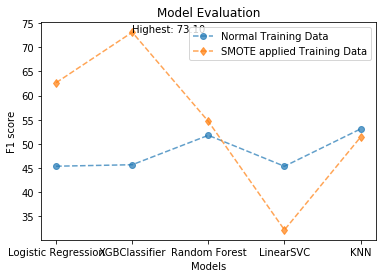

In [139]:
line1,line2 = plt.plot (
          ['Logistic Regression', 'XGBClassifier', 'Random Forest','LinearSVC','KNN'],f1_org ,'--o'
         ,['Logistic Regression', 'XGBClassifier', 'Random Forest','LinearSVC','KNN'], f1_smote,'--d'
         ,alpha=0.7)
plt.legend((line1,line2), 
           ('Normal Training Data', 'SMOTE applied Training Data'))
plt.annotate('Highest: 73.10', ['XGBClassifier', 73.10])
plt.title("Model Evaluation")
plt.ylabel('F1 score')
plt.xlabel('Models')
plt.show()